In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVR


In [103]:
df = sns.load_dataset('mpg')
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [104]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [105]:
df.duplicated().any()

False

In [106]:
df.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [107]:
df['horsepower'].isnull().sum()

6

In [108]:
df.dropna(inplace = True) 

In [109]:
df = df.sort_values(by='horsepower')

In [110]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


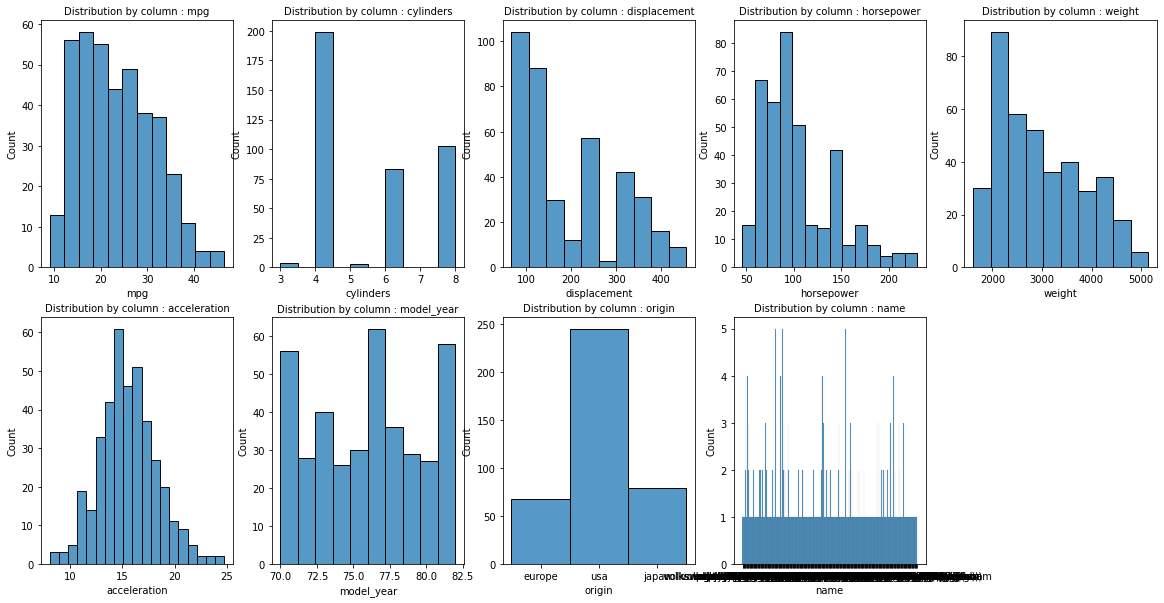

In [111]:
plt.figure(figsize=(20,10))
for index, column in enumerate(df.columns):
    plt.subplot(2,5,index+1)
    sns.histplot(df[column])
    plt.title(f"Distribution by column : {column}", fontsize=10)
plt.show()

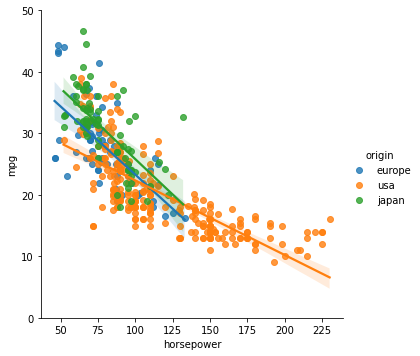

In [112]:
var = 'horsepower'
plot = sns.lmplot(var,'mpg',data=df, hue = 'origin')
plot.set(ylim = (0,50));

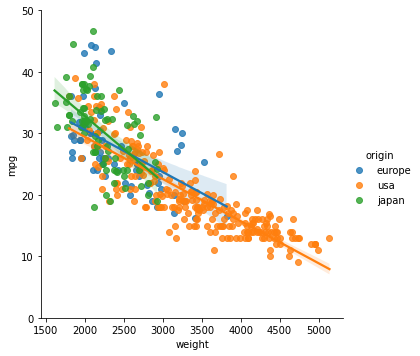

In [113]:
var = 'weight'
plot = sns.lmplot(var,'mpg',data=df, hue = 'origin')
plot.set(ylim = (0,50));

In [114]:
X = df[['horsepower', 'weight']]
y = df['mpg']

In [115]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=100)

In [116]:
scaler = StandardScaler()

In [117]:
X_train_scaled = scaler.fit_transform(X_train)

In [118]:
X_test_scaled = scaler.transform(X_test)

In [119]:
rbf_model = SVR()
rbf_model.fit(X_train_scaled,y_train)
rbf_y_pred = rbf_model.predict(X_test_scaled)
rbf_score = rbf_model.score(X_test_scaled,y_test)
rbf_params = rbf_model.get_params()
rbf_intercept = rbf_model.intercept_

In [120]:
linear_model = SVR(kernel='linear')
linear_model.fit(X_train_scaled,y_train)
linear_y_pred = linear_model.predict(X_test_scaled)
linear_score = linear_model.score(X_test_scaled,y_test)
linear_score

0.6982469719543396

In [121]:
linear_params = linear_model.get_params()
linear_intercept = linear_model.intercept_
linear_params

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [122]:
linear_model.coef_

array([[-1.5747882 , -4.78031539]])

In [123]:
sigmoid_model = SVR(kernel = 'sigmoid')
sigmoid_model.fit(X_train_scaled,y_train)
sigmoid_y_pred = sigmoid_model.predict(X_test_scaled)
sigmoid_score = sigmoid_model.score(X_test_scaled,y_test)
sigmoid_params = sigmoid_model.get_params()
sigmoid_intercept = sigmoid_model.intercept_

In [124]:
sigmoid_score

-0.21050990875987718

In [125]:
sigmoid_params

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'sigmoid',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [126]:
# X_train_sorted = np.sort(X_train_scaled[:,0]).reshape(262,1)
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df

,0,1
0,-0.998475,-1.204412
1,-0.009634,0.828773
2,2.202247,1.627156
3,-1.362785,-1.381958
4,-0.269855,-0.717593
...,...,...
257,1.161362,0.497736
258,1.603738,2.181557
259,1.109317,1.896338
260,0.250587,-0.378538


In [130]:
X_train_scaled_df = X_train_scaled_df.sort_values(by=[0, 'y']).reset_index()

In [127]:
X_train_scaled_df

,0,1
0,-0.998475,-1.204412
1,-0.009634,0.828773
2,2.202247,1.627156
3,-1.362785,-1.381958
4,-0.269855,-0.717593
...,...,...
257,1.161362,0.497736
258,1.603738,2.181557
259,1.109317,1.896338
260,0.250587,-0.378538


In [128]:
y_train = y_train.reset_index()

In [129]:
X_train_scaled_df["y"] = y_train['mpg']

In [131]:
X_train_scaled_df

,index,0,1,y
0,198,-1.544940,-1.336140,26.0
1,232,-1.492895,-1.164321,43.1
2,221,-1.492895,-0.763412,43.4
3,165,-1.388807,-1.549195,31.0
4,261,-1.388807,-0.998230,44.0
...,...,...,...,...
257,201,2.722689,1.581338,11.0
258,169,2.852800,1.501156,14.0
259,230,3.113021,2.233102,12.0
260,119,3.113021,1.630592,14.0


In [132]:
df_graph_x = X_train_scaled_df[0].values.reshape(262,1)
df_graph_y = X_train_scaled_df['y']

In [133]:
df_graph_x, df_graph_y

(array([[-1.54493971],
        [-1.49289546],
        [-1.49289546],
        [-1.38880694],
        [-1.38880694],
        [-1.36278482],
        [-1.36278482],
        [-1.33676269],
        [-1.23267417],
        [-1.23267417],
        [-1.18062992],
        [-1.18062992],
        [-1.12858566],
        [-1.10256353],
        [-1.10256353],
        [-1.05051928],
        [-1.05051928],
        [-1.05051928],
        [-1.05051928],
        [-1.05051928],
        [-1.05051928],
        [-1.02449715],
        [-0.99847502],
        [-0.99847502],
        [-0.99847502],
        [-0.99847502],
        [-0.99847502],
        [-0.99847502],
        [-0.99847502],
        [-0.99847502],
        [-0.97245289],
        [-0.97245289],
        [-0.97245289],
        [-0.97245289],
        [-0.94643076],
        [-0.94643076],
        [-0.92040864],
        [-0.92040864],
        [-0.92040864],
        [-0.92040864],
        [-0.92040864],
        [-0.92040864],
        [-0.92040864],
        [-0

In [134]:
y_train

,index,mpg
0,129,31.0
1,364,26.6
2,70,13.0
3,181,33.0
4,22,25.0
...,...,...
257,2,18.0
258,104,12.0
259,159,14.0
260,180,25.0


In [135]:
X_train_scaled.shape, y_train.shape

((262, 2), (262, 2))

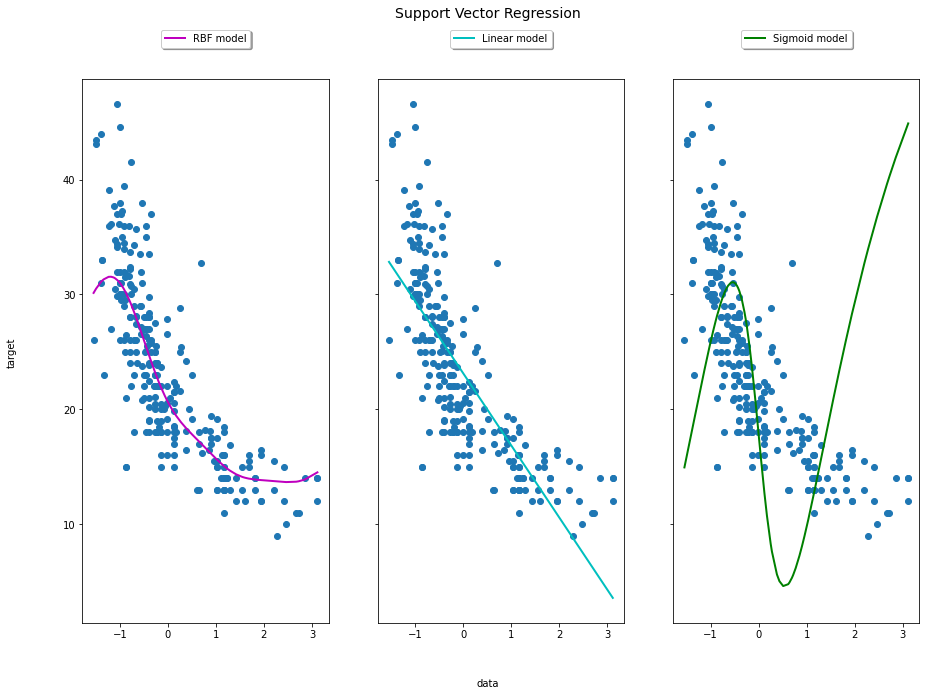

In [136]:
lw = 2

svrs = [rbf_model, linear_model, sigmoid_model]
kernel_label = ["RBF", "Linear", "Sigmoid"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        df_graph_x,
        svr.fit(df_graph_x, df_graph_y).predict(df_graph_x),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X_train_scaled[:,0],
        y_train['mpg']
    )
    # axes[ix].scatter(
    #     X_train_scaled[svr.support_],
    #     y_train[svr.support_],
    #     facecolor="none",
    #     edgecolor=model_color[ix],
    #     s=50,
    #     label="{} support vectors".format(kernel_label[ix]),
    # )
    # axes[ix].scatter(
    #     X_train_scaled[np.setdiff1d(np.arange(len(X_train_scaled)), svr.support_)],
    #     y_train[np.setdiff1d(np.arange(len(X_train_scaled)), svr.support_)],
    #     facecolor="none",
    #     edgecolor="k",
    #     s=50,
    #     label="other training data",
    # )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [137]:
X_train.shape,y_train.shape

((262, 2), (262, 2))

In [138]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
X.shape,y.shape

((40, 1), (40,))

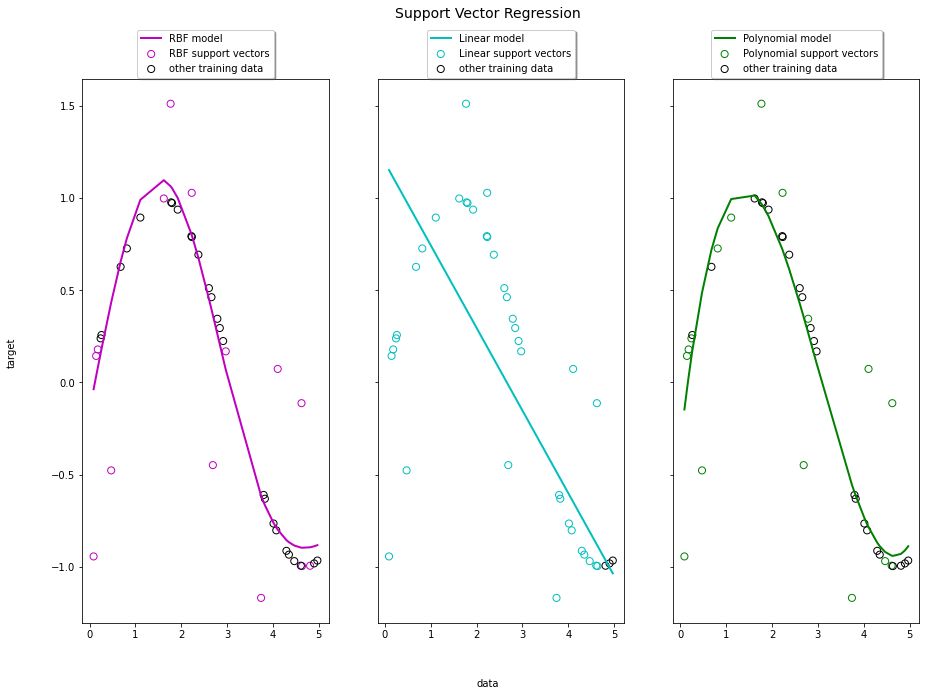

In [139]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

Mean Absolute Error: 2.842


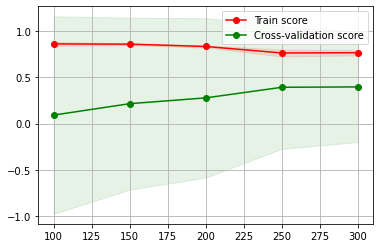

In [13]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve

# Charger le jeu de données mpg
data = sns.load_dataset('mpg').drop_duplicates().dropna()

# Sélectionner les variables explicatives et la variable cible
X = data[["horsepower", "weight"]]
y = data["mpg"]

# Diviser les données en un ensemble d'entraînement et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize the SVR model
model = SVR(kernel='rbf', C=1, gamma='scale')
pipeline = make_pipeline(StandardScaler(), model)

# Entraîner le modèle sur l'ensemble d'entraînement
pipeline.fit(X_train, y_train)

# Évaluer le modèle sur l'ensemble de test
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.3f}')

# Learning Curve 
train_sizes, train_scores, test_scores = learning_curve(pipeline, X, y, n_jobs=-1, train_sizes=[100,150,200,250,300])
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-',color="r", label="Train score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
label="Cross-validation score")
plt.legend(loc="best")
plt.show()
